In [2]:
!pip install opencv-python==3.4.17.63

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-3.4.17.63-cp36-abi3-win_amd64.whl (31.3 MB)


In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inlint

Matplotlib is building the font cache; this may take a moment.
UsageError: Line magic function `%` not found.


In [4]:
img = cv2.imread('./test_images/alam_test_1.jpg')
img.shape

(960, 953, 3)

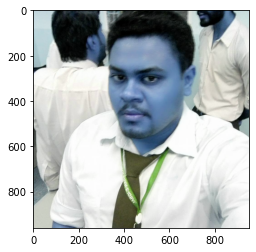

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(960, 953)

In [7]:
gray

array([[210, 210, 210, ..., 216, 216, 219],
       [210, 210, 210, ..., 218, 218, 216],
       [211, 211, 211, ..., 220, 220, 216],
       ...,
       [203, 203, 203, ..., 251, 251, 251],
       [202, 202, 202, ..., 251, 251, 248],
       [202, 202, 202, ..., 251, 251, 246]], dtype=uint8)

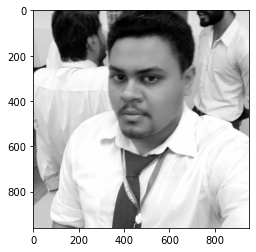

In [8]:
plt.imshow(gray, cmap="gray")

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[268, 155, 380, 380]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(268, 155, 380, 380)

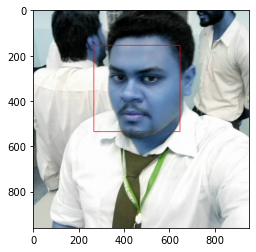

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

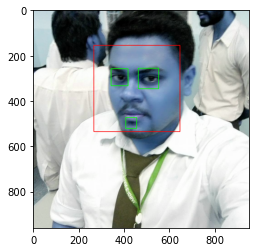

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap="gray")
plt.show()

In [13]:
# faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# for (x,y,w,h) in faces:
#     face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = face_img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# cv2.imshow('face_img',face_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

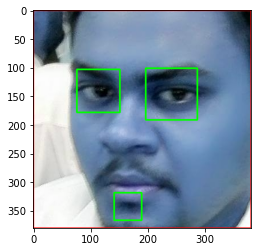

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

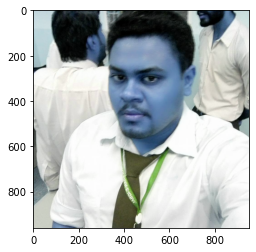

In [16]:
org_image_kb = cv2.imread('./test_images/alam_test_1.jpg')
plt.imshow(org_image_kb)

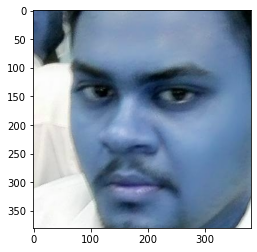

In [17]:
cropped_image_kb1 = get_cropped_image_if_2_eyes('./test_images/alam_test_1.jpg')
plt.imshow(cropped_image_kb1)

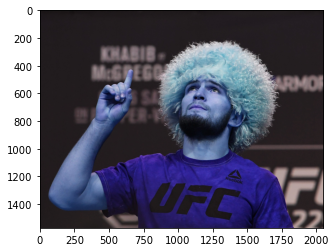

In [18]:
org_image_kb3 = cv2.imread('./test_images/khabib_test3.jpg')
plt.imshow(org_image_kb3)

In [26]:
cropped_image_kb3 = get_cropped_image_if_2_eyes('./test_images/khabib_test3.jpg')
cropped_image_kb3

# DATA ORGANIZING:

In [27]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [28]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [29]:
img_dirs

['./dataset/amir_khan',
 './dataset/babar_azam',
 './dataset/khabib_nurmagomedov',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/mohammad_rizwan',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/shaheen_afridi']

In [30]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [31]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            

amir_khan
Generating cropped images in folder:  ./dataset/cropped/amir_khan
babar_azam
Generating cropped images in folder:  ./dataset/cropped/babar_azam
khabib_nurmagomedov
Generating cropped images in folder:  ./dataset/cropped/khabib_nurmagomedov
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
mohammad_rizwan
Generating cropped images in folder:  ./dataset/cropped/mohammad_rizwan
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
shaheen_afridi
Generating cropped images in folder:  ./dataset/cropped/shaheen_afridi


# WAVELET TRANSFORMATION:

In [32]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    
    # Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY)
    
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    
    # Compute Coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    # Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

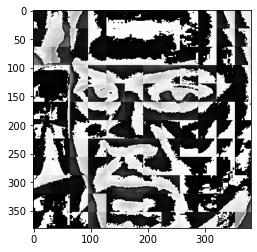

In [33]:
im_har = w2d(cropped_image_kb1, 'db1', 5)
plt.imshow(im_har, cmap='gray')

 Manually examine cropped folder and delete any unwanted images

In [35]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'amir_khan': ['./dataset/cropped/amir_khan\\amir_khan1.png',
  './dataset/cropped/amir_khan\\amir_khan10.png',
  './dataset/cropped/amir_khan\\amir_khan11.png',
  './dataset/cropped/amir_khan\\amir_khan12.png',
  './dataset/cropped/amir_khan\\amir_khan13.png',
  './dataset/cropped/amir_khan\\amir_khan14.png',
  './dataset/cropped/amir_khan\\amir_khan15.png',
  './dataset/cropped/amir_khan\\amir_khan16.png',
  './dataset/cropped/amir_khan\\amir_khan17.png',
  './dataset/cropped/amir_khan\\amir_khan18.png',
  './dataset/cropped/amir_khan\\amir_khan19.png',
  './dataset/cropped/amir_khan\\amir_khan2.png',
  './dataset/cropped/amir_khan\\amir_khan20.png',
  './dataset/cropped/amir_khan\\amir_khan21.png',
  './dataset/cropped/amir_khan\\amir_khan22.png',
  './dataset/cropped/amir_khan\\amir_khan23.png',
  './dataset/cropped/amir_khan\\amir_khan3.png',
  './dataset/cropped/amir_khan\\amir_khan4.png',
  './dataset/cropped/amir_khan\\amir_khan5.png',
  './dataset/cropped/amir_khan\\amir_khan6

In [36]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'amir_khan': 0,
 'babar_azam': 1,
 'khabib_nurmagomedov': 2,
 'lionel_messi': 3,
 'maria_sharapova': 4,
 'mohammad_rizwan': 5,
 'roger_federer': 6,
 'serena_williams': 7,
 'shaheen_afridi': 8}

In [37]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [38]:
32*32*3 + 32*3

3168

In [39]:
len(X[0])

4096

In [40]:
X[0]

array([[ 56],
       [ 28],
       [ 48],
       ...,
       [235],
       [  0],
       [  0]], dtype=uint8)

In [41]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(260, 4096)

In [42]:
X[0]

array([ 56.,  28.,  48., ..., 235.,   0.,   0.])

# MODEL TRAINING:

We will be using SVM (Support Vector Machines) with rbf Kernel turned with heuristic finetuning. 

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


pipe = Pipeline([('scalar', StandardScaler()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5230769230769231

In [45]:
len(X_test)

65

In [46]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.10      0.33      0.15         3
           2       0.60      0.43      0.50         7
           3       0.47      0.70      0.56        10
           4       0.73      0.89      0.80         9
           5       1.00      0.50      0.67         8
           6       1.00      0.18      0.31        11
           7       0.50      0.88      0.64         8
           8       0.50      0.50      0.50         2

    accuracy                           0.52        65
   macro avg       0.60      0.51      0.48        65
weighted avg       0.66      0.52      0.51        65



GridSearch will be used to try out different models with different parameters. Goal is to come up with the best model with best fine tuned parameters.

In [47]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [49]:
scores = []
best_estimators = {}

import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_score' : clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.682051,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.471795,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.723077,{'logisticregression__C': 1}


In [50]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [51]:
best_estimators['svm'].score(X_test, y_test)

0.5692307692307692

In [52]:
best_estimators['random_forest'].score(X_test, y_test)

0.4307692307692308

In [53]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6461538461538462

In [54]:
best_clf = best_estimators['logistic_regression'] 

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf)

TypeError: Expected sequence or array-like, got <class 'sklearn.pipeline.Pipeline'>

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 6, 0, 0, 1, 2, 1],
       [0, 0, 0, 0, 7, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 7, 0, 0, 0],
       [2, 0, 1, 0, 0, 0, 4, 2, 2],
       [0, 0, 0, 0, 0, 2, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

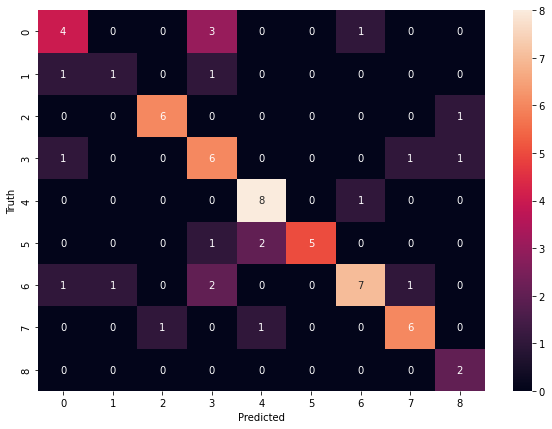

In [164]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'amir_khan': 0,
 'babar_azam': 1,
 'khabib_nurmagomedov': 2,
 'lionel_messi': 3,
 'maria_sharapova': 4,
 'mohammad_rizwan': 5,
 'roger_federer': 6,
 'serena_williams': 7,
 'shaheen_afridi': 8}

SAVE THE TRAINED MODEL

In [59]:
!pip install joblib
import joblib

# Saving the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

SAVE CLASS DICTIONARY

In [60]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))